In [1]:
%matplotlib inline

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc

import sys
sys.path.append('/home/ngr4/project/scnd/scripts/')
import data as scnddata

# for this script
from scipy.stats import zscore

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=1#0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [2]:
adata = scnddata.load_mouse_imputed(add_md=scnddata.load_md(), only_wt=True)
pfp = '/home/ngr4/project/scnd/results'

In [3]:
# redo with mut
adata = scnddata.load_mouse_imputed(add_md=scnddata.load_md(), only_mut=True)
pfp = '/home/ngr4/project/scnd/results'

In [4]:
# aesthetic
cmap_ctype={'Granule cell': '#FAC18A',
            'Unipolar brush cell': '#BA61BA',
            'Purkinje cell': '#EE5264',
            'GABAergic interneuron 1': '#F9EBAE',
            'GABAergic interneuron 2': '#88BB92',
            'GABAergic interneuron 3': '#46A928',
            'Astrocyte': '#F9AEAE',
            'Bergmann glia': '#AEB7F9',
            'Oligodendrocyte progenitor cell': '#F1815F',
            'Oligodendrocyte': '#75A3B7',
            'Microglia': '#AC5861',
            'Pericyte': '#2D284B',
            'Endothelial cell': '#1C67EE',
            'Deep cerebellar nuclei': '#aaaaaa'}

cmap_genotype={'WT':'#010101',
               'SCA1':'#ffd478'}

In [5]:
interactors = []
with open(os.path.join(pfp,'atxn_interactors.csv')) as f:
    for line in f:
        gene = line.rstrip()
        gene = gene[0] + gene[1:].lower()
        interactors.append(gene)
f.close()

In [6]:
retained_interactors = [i for i in interactors if i in adata.var.index.to_list()]
missing_interactors = [i for i in interactors if i not in adata.var.index.to_list()]
print('These interactors were not in the data:')
for i in range(0, len(missing_interactors) - 4, 4):
    print('  {}, {}, {}, {}, '.format(missing_interactors[i], missing_interactors[i+1], missing_interactors[i+2], missing_interactors[i+3]))

# create dataframe
X = pd.DataFrame({'ctype':adata.obs['ctype_ubcupdate'],
                  'gtype':adata.obs['genotype'],
                  'time':adata.obs['timepoint']}) # can add time here, if interested

x = pd.DataFrame(np.asarray(adata[:, retained_interactors].X),
                 columns=adata[:, retained_interactors].var_names,
                 index=adata.obs.index)

X = pd.merge(X,x, left_index=True,right_index=True)
del x

These interactors were not in the data:
  Bend2, C1orf94, C2orf27b, Dhrsx, 
  Eif1ay, Fam21c, Hotair, Hsfx1, 
  Kiaa1429, Kiaa1549l, Kiaa2026, Loc401442, 
  Mageb2, Mageb6, Nutm2b, Prr20a, 
  Qki, Rhoxf2, Spf45, Supt20h, 
  Tp53i11, Wbscr16, Yy1ap1, Znf276, 


## Per timepoint, per genotype

In [7]:
gt = 'SCA1'

In [8]:
for t in ['5wk','12wk','18wk','24wk','30wk']:
    x = X.loc[X['time']==t,:]
    x = x.set_index(['ctype','gtype'])
    x = x.drop(columns=['time'])
    x[x.columns] = zscore(x,axis=0)
    x = x.reset_index()
    x = x.groupby(['ctype','gtype']).mean()
    x = x.reset_index()
    # x = x.set_index(['/ctype','gtype'])
    x['ctype_colors'] = x['ctype'].map(cmap_ctype)
    x['gtype_colors'] = x['gtype'].map(cmap_genotype)
    
    x.to_csv('/home/ngr4/project/scnd/results/fig1jupdate_zscore_perctypegt_{}_{}.csv'.format(gt, t))

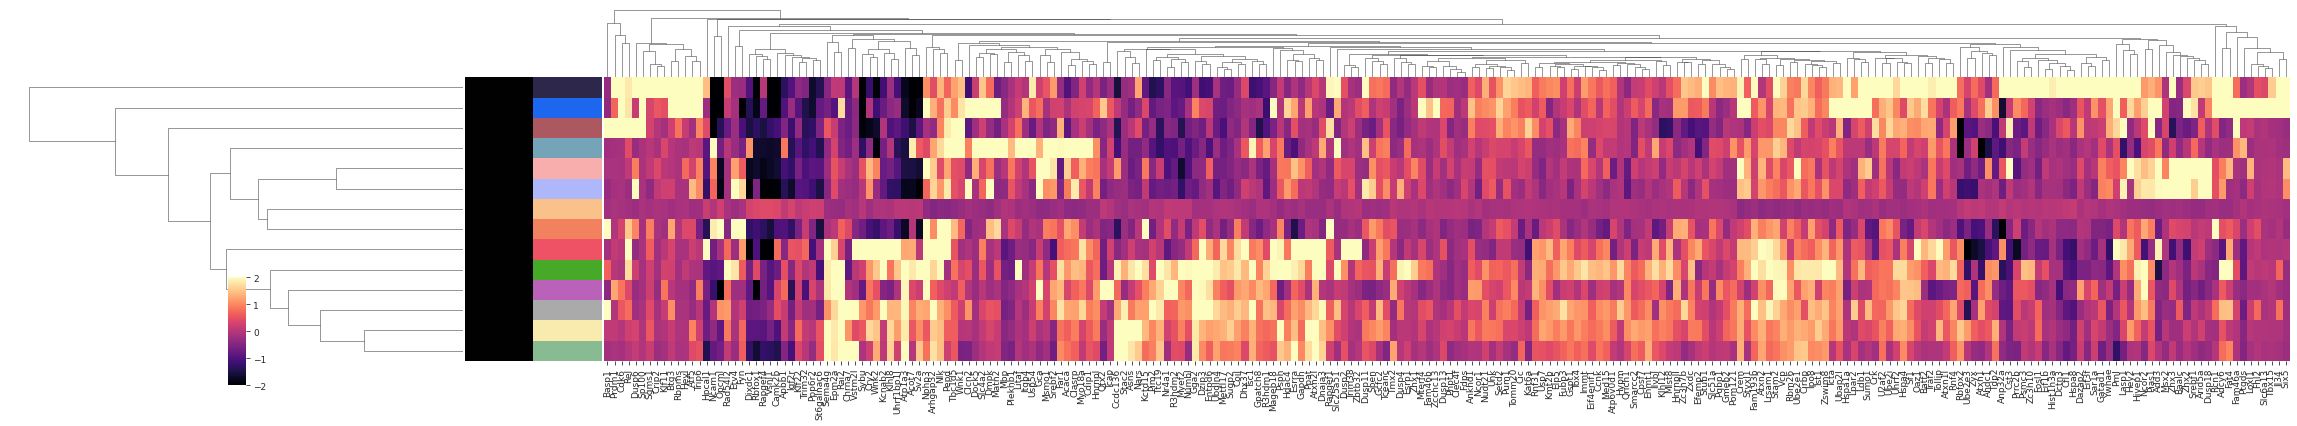

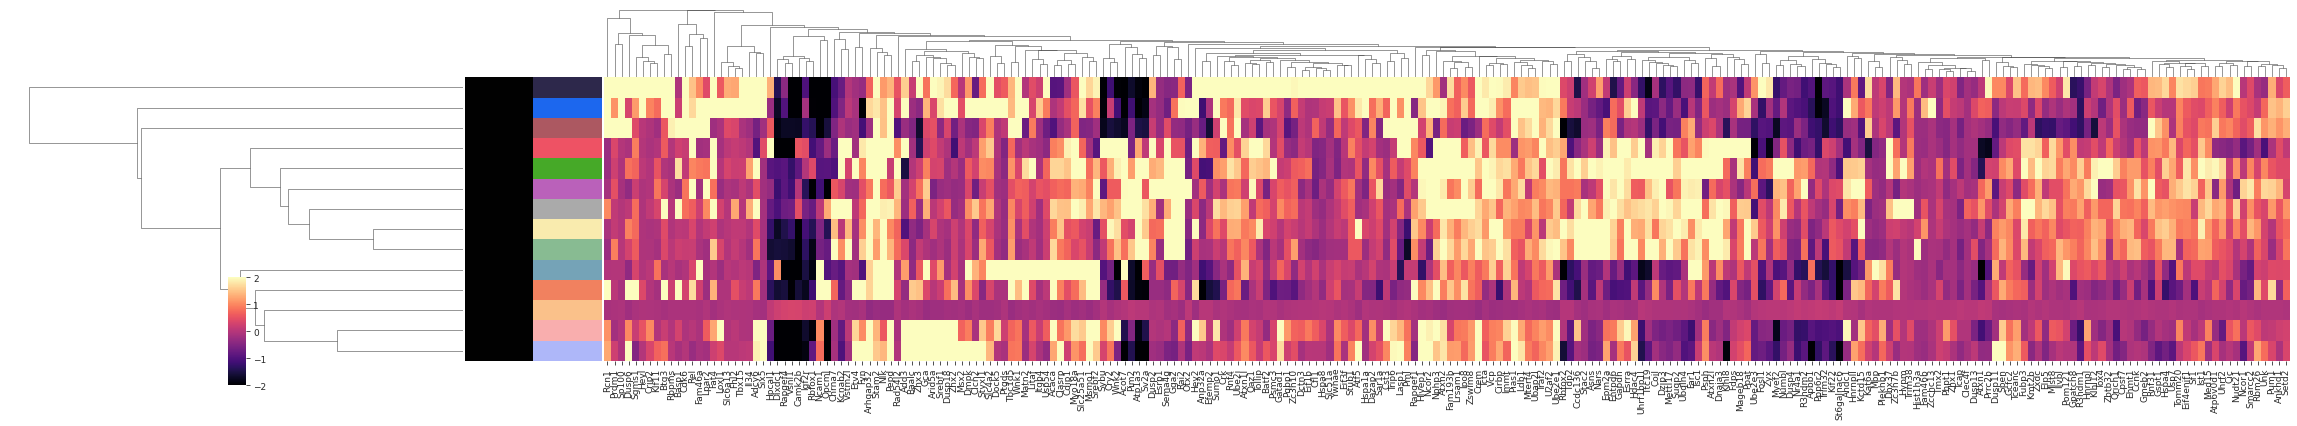

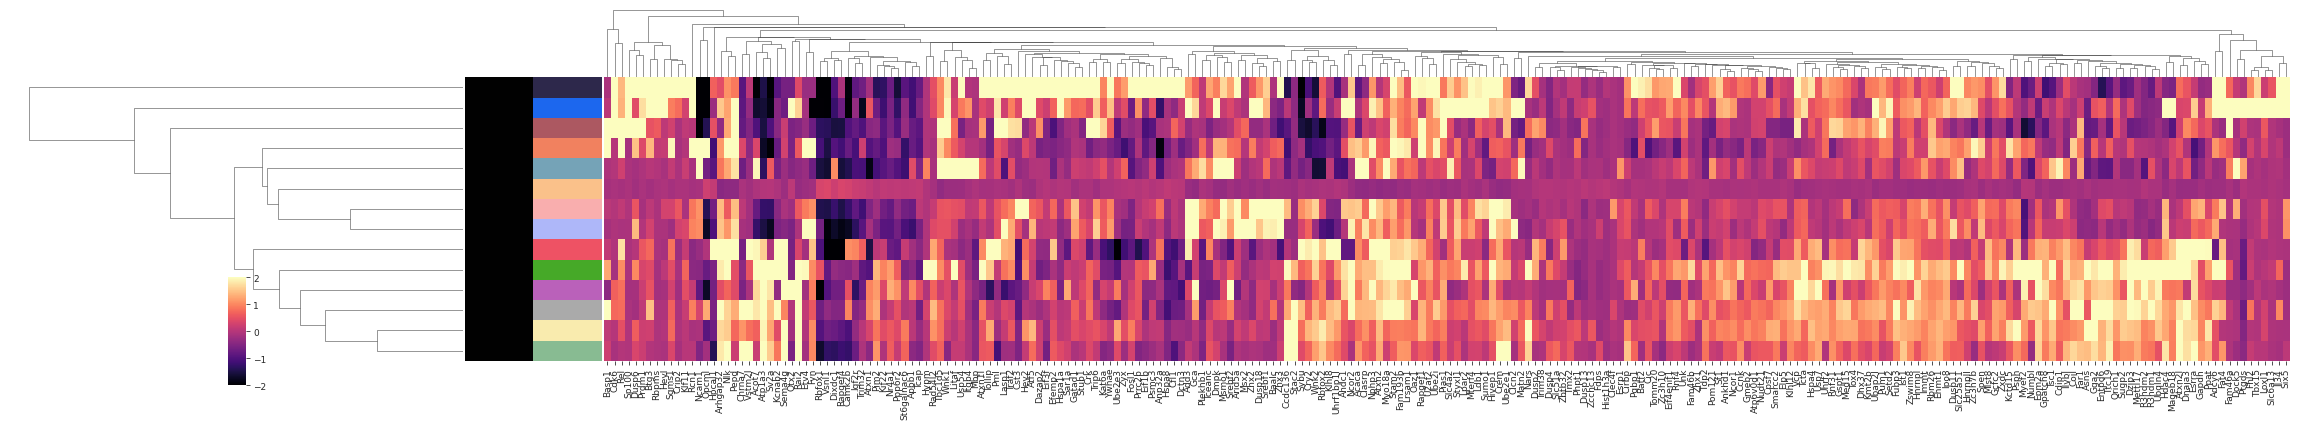

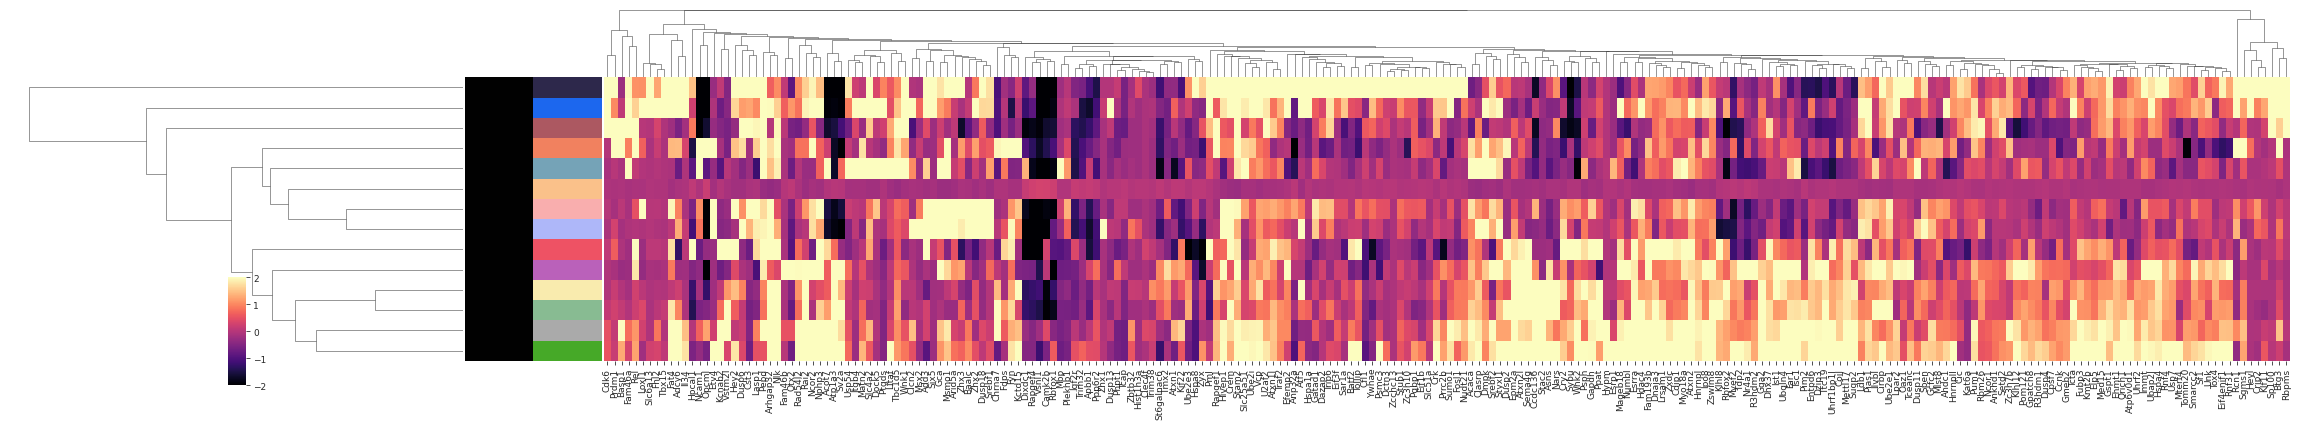

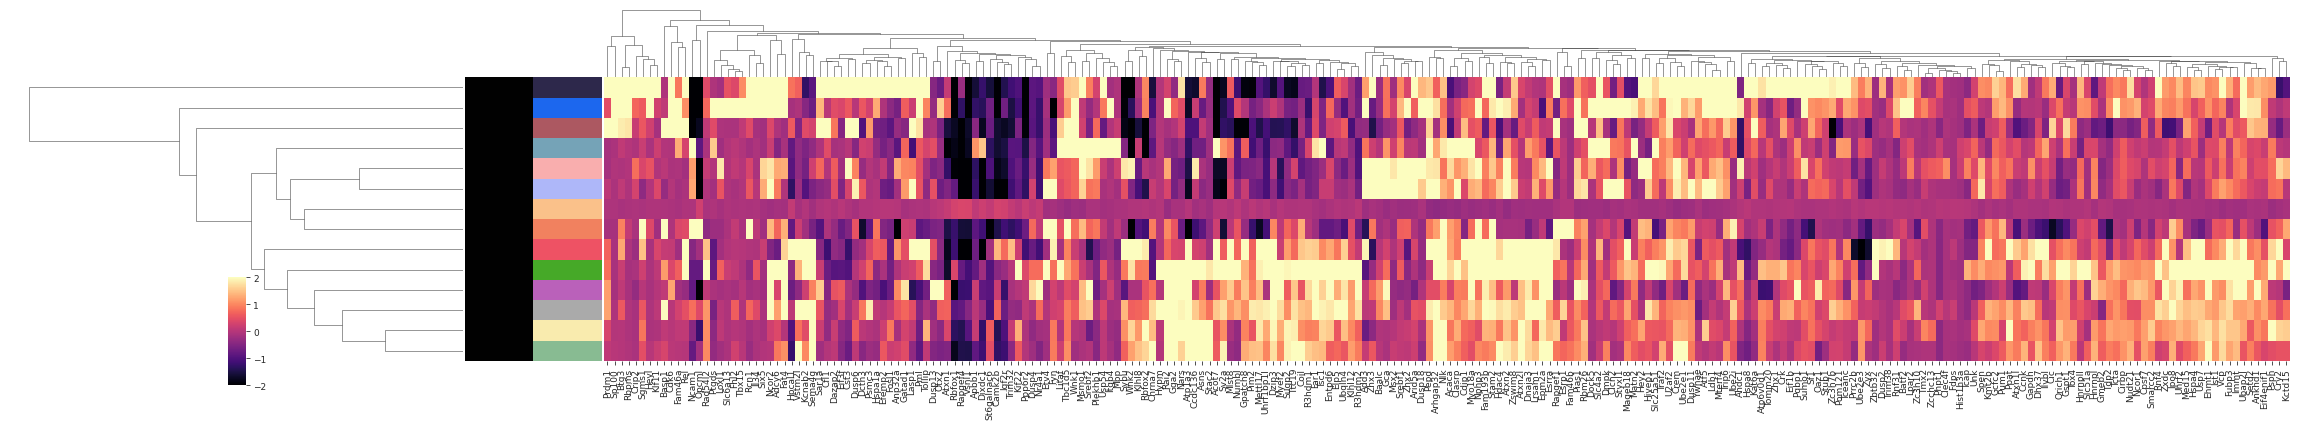

In [37]:
# plot
for t in ['5wk','12wk','18wk','24wk','30wk']:
    x = X.loc[X['time']==t,:]
    x = x.set_index(['ctype','gtype'])
    x = x.drop(columns=['time'])
    x[x.columns] = zscore(x,axis=0)
    x = x.reset_index()
    x = x.groupby(['ctype','gtype']).mean()
    x = x.reset_index()
    # x = x.set_index(['/ctype','gtype'])
    x['ctype_colors'] = x['ctype'].map(cmap_ctype)
    x['gtype_colors'] = x['gtype'].map(cmap_genotype)

    x_condition = x.loc[x['gtype']==condition]
    cols = [i for i in x.columns if i not in ['ctype','gtype','gtype_colors','ctype_colors']]
    p = sns.clustermap(x_condition[cols], 
                       cmap='magma',
                       col_cluster=True,
                       row_cluster=True,
                       row_colors=[x_condition['gtype_colors'],x_condition['ctype_colors']],
                       xticklabels=True,
                       yticklabels=False,
                       vmin=-2,vmax=2,
                       figsize=(32,6))
    p.cax.set_position([0.1, 0.1, .008, .25])
    p.savefig(os.path.join(pfp,'fig1jupdate_atxn1ints_aveZscore_{}_{}.pdf'.format(gt,t)),bbox_inches='tight')




## all timepoints, per genotype

Showing expression 


In [9]:
t = 'allt'
x = X
x = x.set_index(['ctype','gtype'])
x = x.drop(columns=['time'])
x[x.columns] = zscore(x,axis=0)
x = x.reset_index()
x = x.groupby(['ctype','gtype']).mean()
x = x.reset_index()
# x = x.set_index(['/ctype','gtype'])
x['ctype_colors'] = x['ctype'].map(cmap_ctype)
x['gtype_colors'] = x['gtype'].map(cmap_genotype)





In [10]:
x.to_csv('/home/ngr4/project/scnd/results/fig1jupdate_{}pergt_{}.csv'.format(t, gt))

In [ ]:
# plot
x_condition = x.loc[x['gtype']==condition]
cols = [i for i in x.columns if i not in ['ctype','gtype','gtype_colors','ctype_colors']]
p = sns.clustermap(x_condition[cols], 
                   cmap='magma',
                   col_cluster=True,
                   row_cluster=True,
                   row_colors=[x_condition['gtype_colors'],x_condition['ctype_colors']],
                   xticklabels=True,
                   yticklabels=False,
                   vmin=-2,vmax=2,
                   figsize=(32,6))
p.cax.set_position([0.1, 0.1, .008, .25])
p.savefig(os.path.join(pfp,'fig1jupdate_atxn1ints_aveZscore_{}_{}.pdf'.format(t,condition)),bbox_inches='tight')

# merge csvs for table

In [14]:
t = 'allt'
for i, gt in enumerate(['WT', 'SCA1']):
    if i==0:
        df = pd.read_csv('/home/ngr4/project/scnd/results/fig1jupdate_{}pergt_{}.csv'.format(t, gt))
    else:
        dt = pd.read_csv(('/home/ngr4/project/scnd/results/fig1jupdate_{}pergt_{}.csv'.format(t, gt)))
        df = df.append(dt, ignore_index=True)
df.to_csv('/home/ngr4/project/scnd/results/fig1jupdate_{}pergt.csv'.format(t))

In [16]:
for j, gt in enumerate(['WT', 'SCA1']):
    for i, t in enumerate(['{}wk'.format(j) for j in [5, 12, 18, 24, 30]]):
        if i==0 and j==0:
            df = pd.read_csv('/home/ngr4/project/scnd/results/fig1jupdate_zscore_perctypegt_{}_{}.csv'.format(gt, t), index_col=0)
        else:
            dt = pd.read_csv('/home/ngr4/project/scnd/results/fig1jupdate_zscore_perctypegt_{}_{}.csv'.format(gt, t), index_col=0)
            df = df.append(dt, ignore_index=True)
df.to_csv('/home/ngr4/project/scnd/results/fig1jupdate_zscore_perctypegt.csv')